<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa pixel về [0, 1]
data = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục -> batch
generator = data.flow_from_directory(
    '/content/drive/MyDrive/food',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra
test_generator = data.flow_from_directory(
    '/content/drive/MyDrive/food',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']
X_batch, y_batch = next(generator)
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)


x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10000, batch_size=32, validation_data=(x_test, y_test))

Found 84 images belonging to 5 classes.
Found 84 images belonging to 5 classes.
Epoch 1/10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9685
Epoch 7502/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9686
Epoch 7503/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9686
Epoch 7504/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9686
Epoch 7505/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9686
Epoch 7506/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9687
Epoch 7507/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 1.0000 - loss: 1.3784e-07 - val_accuracy: 0.5952 - val_loss: 1.9687
Epoch 75

In [2]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5731 - loss: 2.3357
test_acc:60.71


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dự đoán là: banh mi


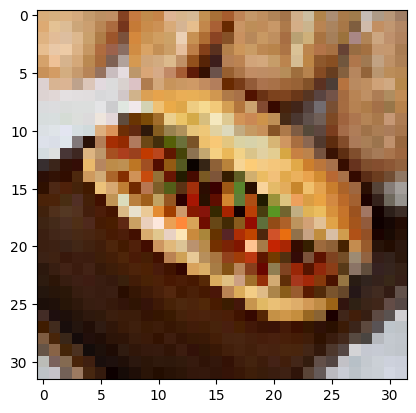

In [5]:
image_path = '/content/drive/MyDrive/food/banh mi/mi13.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']# 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Dự đoán là: banh tet


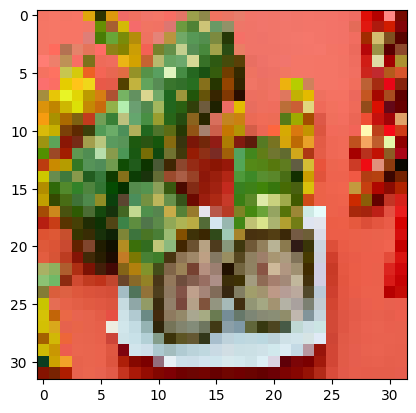

In [7]:
image_path = '/content/drive/MyDrive/food/banh tet/t1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']# 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Dự đoán là: bun bo


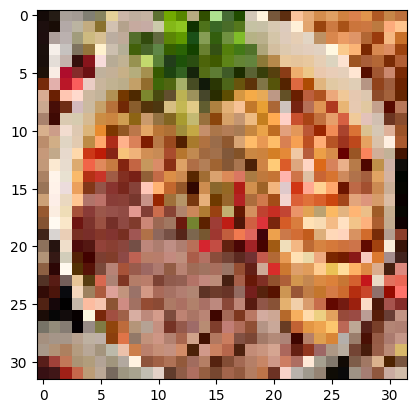

In [8]:
image_path = '/content/drive/MyDrive/food/bun bo/bo1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']# 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Dự đoán là: cá kho


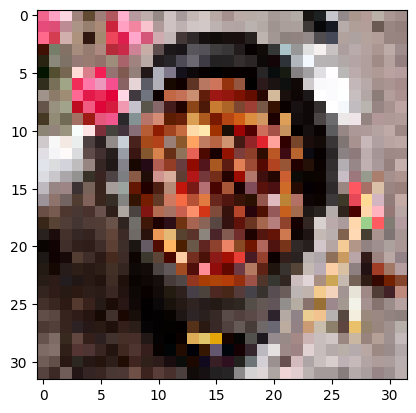

In [9]:
image_path = '/content/drive/MyDrive/food/cá kho/k1.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']# 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Dự đoán là: com tam


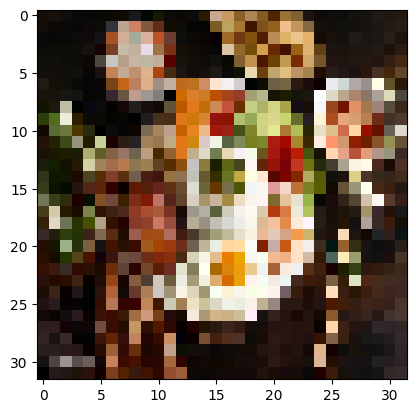

In [12]:
image_path = '/content/drive/MyDrive/food/com tam/c2.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['banh mi', 'banh tet', 'bun bo', 'cá kho', 'com tam']# 0 1 2 3 4
print("Dự đoán là:", class_labels[predicted_index])

In [13]:
model.save('Food.h5')